In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

from fastai.vision import *
from fastai import *
import pandas as pd

In [7]:
dict(list(scipy.io.loadmat('/home/amccarthy13/Documents/cars_dataset/cars_annos.mat').items())[0:5])

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Feb 28 19:34:55 2015',
 '__version__': '1.0',
 '__globals__': [],
 'annotations': array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
         (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
         (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
         ...,
         (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dt

In [8]:
scipy.io.loadmat('/home/amccarthy13/Documents/cars_dataset/cars_test_annos_withlabels.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 '__globals__': [],
 'annotations': array([[(array([[30]], dtype=uint8), array([[52]], dtype=uint8), array([[246]], dtype=uint8), array([[147]], dtype=uint8), array([[181]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
         (array([[100]], dtype=uint8), array([[19]], dtype=uint8), array([[576]], dtype=uint16), array([[203]], dtype=uint8), array([[103]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
         (array([[51]], dtype=uint8), array([[105]], dtype=uint8), array([[968]], dtype=uint16), array([[659]], dtype=uint16), array([[145]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
         ...,
         (array([[33]], dtype=uint8), array([[27]], dtype=uint8), array([[602]], dtype=uint16), array([[252]], dtype=uint8), array([[17]], dtype=uint8), array(['08039.jpg'], dtype='<U9')),
         (array([[33]], dtype=uint8), array([[142]], dtype=uint8), arra

In [9]:
import tarfile
import scipy.io
import numpy as np
import cv2 as cv
import os
import shutil
import random

def save_train_data(fnames, labels, bboxes):
    src_folder = '/home/amccarthy13/Documents/cars_dataset/cars_train/'
    num_samples = len(fnames)
    
    train_split = 0.8
    num_train = int(round(num_samples * train_split))
    train_indexes = random.sample(range(num_samples), num_train)
    
    for i in range(num_samples):
        fname = fnames[i]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]
        
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        
        margin = 16
        x1 = max(0, x1-margin)
        y1 = max(0, y1-margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        
        if i in train_indexes:
            dst_folder = '/home/amccarthy13/Documents/cars_dataset/train/'
        else:
            dst_folder = '/home/amccarthy13/Documents/cars_dataset/valid/'
            
        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)
        
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)
        
def save_test_data(fnames, bboxes):
    src_folder = '/home/amccarthy13/Documents/cars_dataset/cars_test/'
    dst_folder = '/home/amccarthy13/Documents/cars_dataset/test/'
    num_samples = len(fnames)
    
    for i in range(num_samples):
        fname = fnames[i]
        (x1, y1, x2, y2) = bboxes[i]
        
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        
        margin = 16
        x1 = max(0, x1-margin)
        y1 = max(0, y1-margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        
        dst_path = os.path.join(dst_folder, fname)
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)
        
def process_train_data():
    cars_annos = scipy.io.loadmat('/home/amccarthy13/Documents/cars_dataset/devkit/cars_train_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)
    
    fnames = []
    class_ids = []
    bboxes = []
    labels = []
    
    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = annotation[0][4][0][0]
        labels.append('%04d' % (class_id,))
        fname = annotation[0][5][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)
        
    labels_count = np.unique(class_ids).shape[0]
    print('car count: %d' % labels_count)
    
    save_train_data(fnames, labels, bboxes)
    
def process_test_data():
    cars_annos = scipy.io.loadmat('/home/amccarthy13/Documents/cars_dataset/devkit/cars_test_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)
    
    fnames = []
    bboxes = []
    
    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        fname = annotation[0][4][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        fnames.append(fname)
        
    save_test_data(fnames, bboxes)

In [24]:
cars_meta = scipy.io.loadmat('/home/amccarthy13/Documents/cars_dataset/devkit/cars_meta')
class_names = cars_meta['class_names']
class_names = np.transpose(class_names)

img_width, img_height = 224, 224

process_train_data()
process_test_data()

car count: 196


In [50]:
data_notfms = ImageDataBunch.from_folder('/home/amccarthy13/Documents/cars_dataset/','train','valid',ds_tfms=get_transforms()).normalize(imagenet_stats)

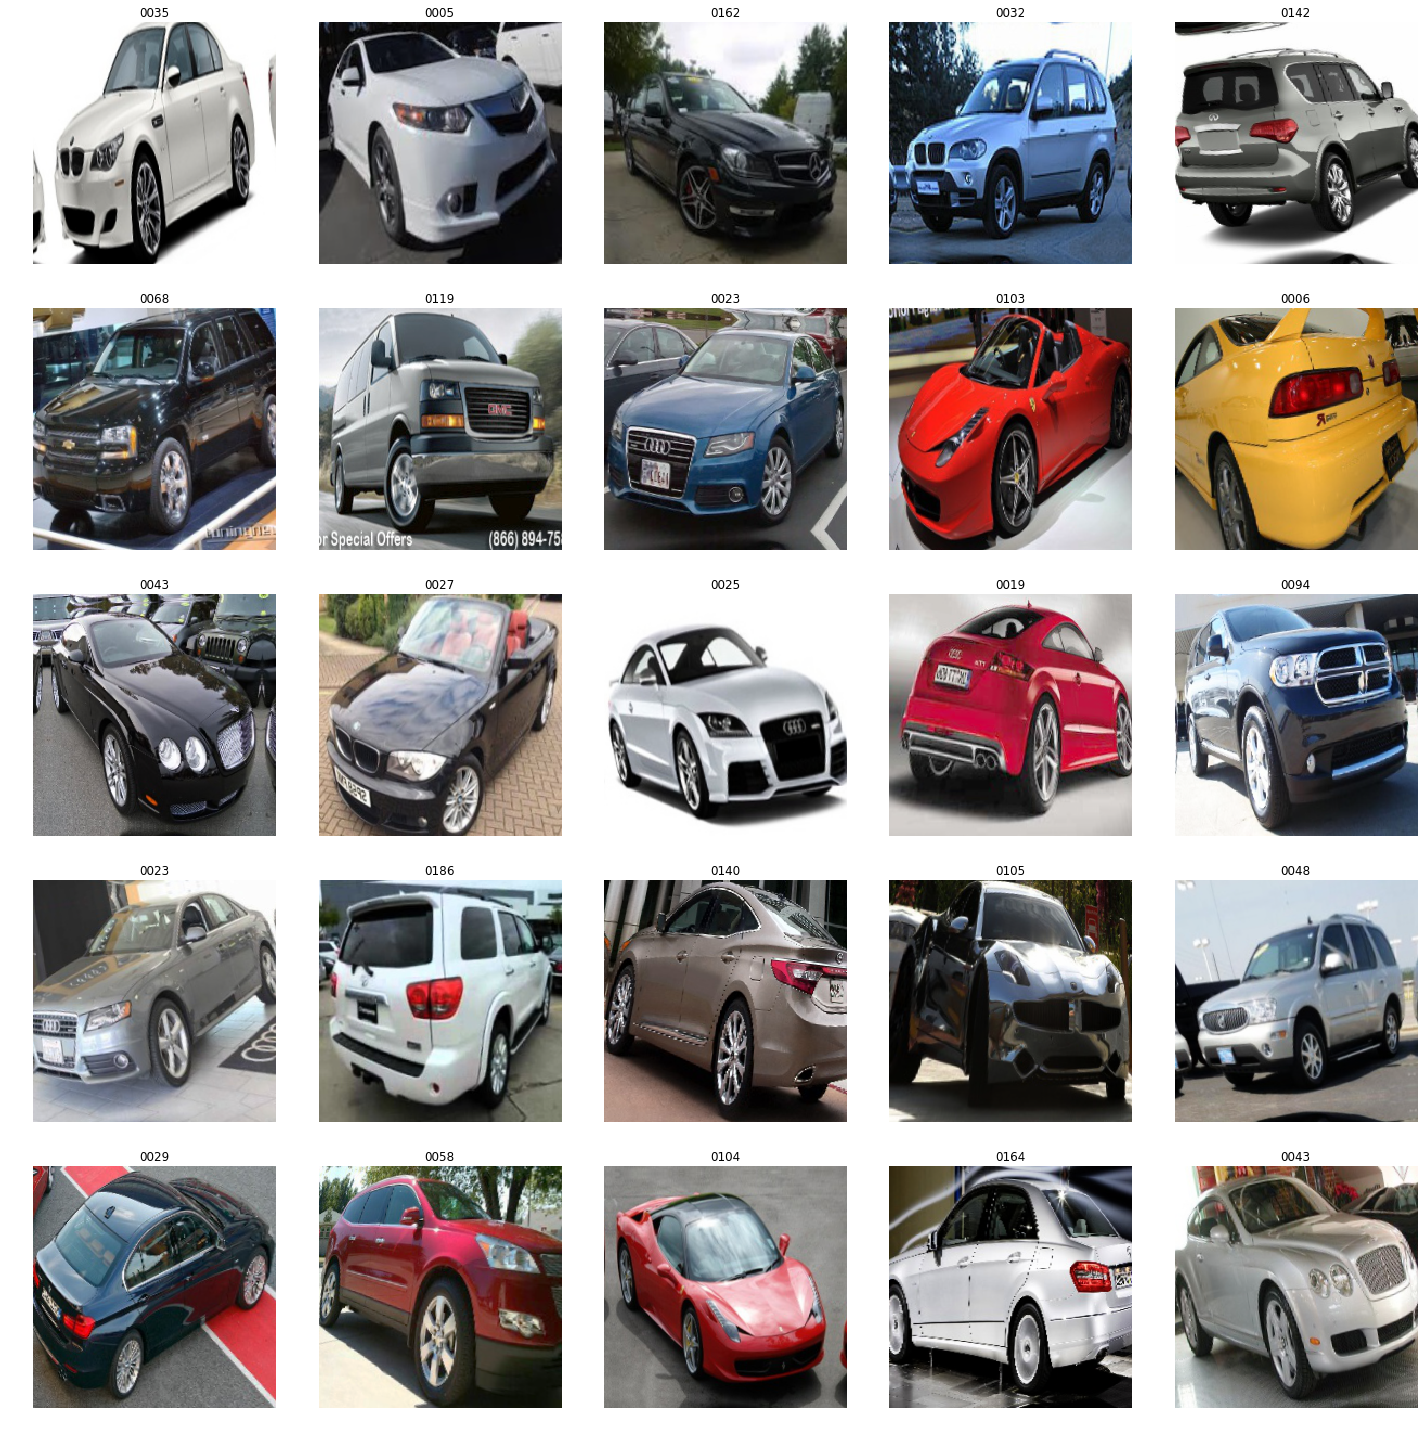

In [5]:
data.show_batch()

In [32]:
len(data.classes)

196

In [33]:
images = Path('/home/amccarthy13/Documents/cars_dataset/train')
learn = create_cnn(data, models.resnet34, metrics=[accuracy, error_rate])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


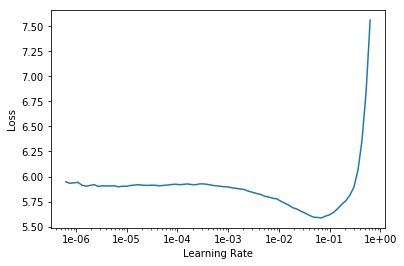

In [34]:
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(4, 1.58E-02)

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,4.247949,3.992057,0.146716,0.853284,00:11
2,3.142779,2.814381,0.306937,0.693063,00:11
3,2.071341,1.418877,0.607121,0.392879,00:11
4,1.359338,1.192654,0.672805,0.327195,00:11


In [36]:
learn.save('no_tfms_1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


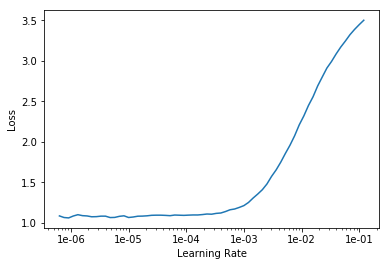

In [37]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(4, 1.50E-05)

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,1.114560,1.122746,0.694291,0.305709,00:15
2,1.033210,1.051370,0.714549,0.285451,00:15
3,0.940479,0.999622,0.724985,0.275015,00:15
4,0.894110,0.992115,0.729896,0.270104,00:15


In [39]:
log_preds, y = learn.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.7440)

In [40]:
learn.save('no_tfms_2')

In [51]:
xtra_tfms = [jitter(magnitude=0.01,p=0.5), squish(scale = 0.66)]
tfms = get_transforms(flip_vert=False,
                      do_flip=True,
                      max_rotate=30.0,
                      max_zoom=1.5,
                      max_lighting=0.4,
                      max_warp=0.4,
                      xtra_tfms=xtra_tfms)

data_tfms = ImageDataBunch.from_folder('/home/amccarthy13/Documents/cars_dataset/','train','valid',ds_tfms=tfms).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet34, metrics=[accuracy, error_rate]).load('no_tfms_2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


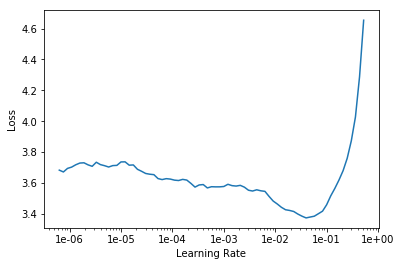

In [42]:
learn.lr_find()
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(8, 1.58E-02)

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,2.819347,1.544873,0.575199,0.424800,00:12
2,2.871124,3.169198,0.271332,0.728668,00:12
3,3.051457,2.660730,0.357888,0.642112,00:12
4,2.841383,2.391223,0.374463,0.625537,00:12
5,2.541049,1.850436,0.500921,0.499079,00:12
6,2.163909,1.426450,0.611418,0.388582,00:12
7,1.842620,1.253135,0.650092,0.349908,00:11
8,1.655712,1.235331,0.658072,0.341928,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


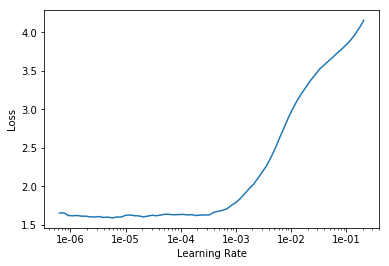

In [44]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(8, 1.50E-05)

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,1.592924,1.217965,0.668508,0.331492,00:15
2,1.544541,1.176955,0.670350,0.329650,00:15
3,1.519854,1.218683,0.659914,0.340086,00:15
4,1.465156,1.126601,0.691222,0.308778,00:15
5,1.422193,1.118055,0.691835,0.308165,00:15
6,1.351186,1.089646,0.693677,0.306323,00:15
7,1.344635,1.077691,0.697974,0.302026,00:15
8,1.331955,1.075042,0.701044,0.298956,00:15


In [46]:
log_preds, y = learn.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.7637)

In [47]:
learn.save('tfms_1')

In [48]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

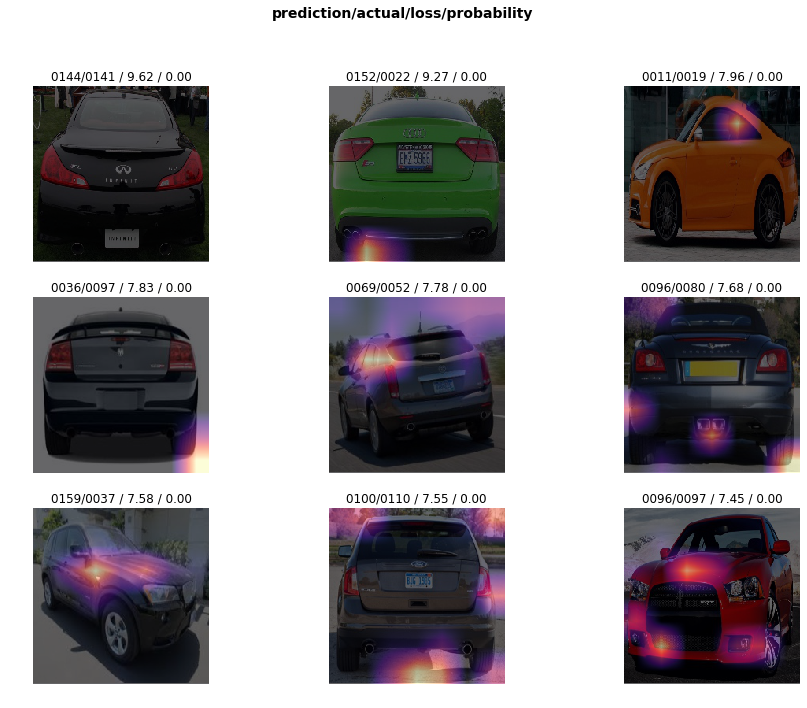

In [49]:
interp.plot_top_losses(9, figsize=(15,11))

In [52]:
learn = create_cnn(data_notfms, models.resnet50, metrics=[accuracy, error_rate])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


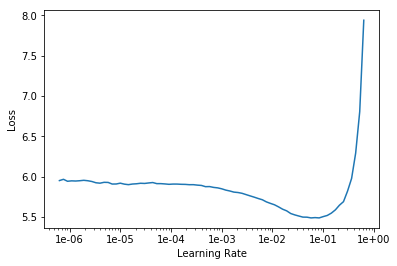

In [53]:
learn.lr_find()
learn.recorder.plot()

In [54]:
learn.fit_one_cycle(4, 1.58E-02)

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,4.050784,6.280723,0.082259,0.917741,00:22
2,2.945687,2.735804,0.338244,0.661756,00:21
3,1.824005,1.262557,0.649478,0.350522,00:21
4,1.062517,0.919344,0.731123,0.268877,00:21


In [55]:
learn.unfreeze
learn.fit_one_cycle(12, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,0.816230,0.913543,0.732351,0.267649,00:21
2,0.827355,0.900822,0.737876,0.262124,00:21
3,0.808464,0.894658,0.740945,0.259055,00:21
4,0.801338,0.880871,0.742173,0.257827,00:21
5,0.821473,0.863863,0.754451,0.245549,00:21
6,0.754031,0.857538,0.754451,0.245549,00:21
7,0.756626,0.849828,0.751381,0.248619,00:21
8,0.736126,0.846051,0.756292,0.243708,00:21
9,0.723848,0.842273,0.756906,0.243094,00:22
10,0.733342,0.839558,0.757520,0.242480,00:21


In [ ]:
tfms = get_transforms(do_flip=False, 
               flip_vert=True, 
               max_rotate=5.0, 
               max_zoom=1.1, 
               max_lighting=0.2,
               max_warp=0.2, 
               p_affine=0.75, 
               p_lighting=0.75)

data = ImageDataBunch.from_folder('.fastai/data/','train','valid',ds_tfms=tfms,size=224,bs=32).normalize(imagenet_stats)